In [1]:
from mlwpy import *
%matplotlib inline

In [2]:
diabetes = datasets.load_diabetes() # this sounds horrible

tts = skms.train_test_split(diabetes.data,
                            diabetes.target,
                            test_size=.25)

(diabetes_train_features, diabetes_test_features,
 diabetes_train_target, diabetes_test_target) = tts

diabetes_df = pd.DataFrame(diabetes.data,
                           columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000


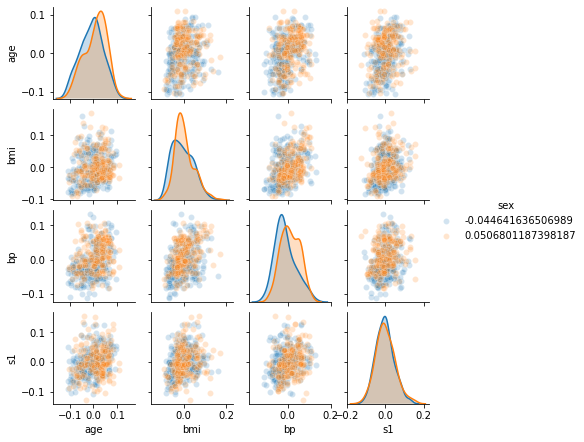

In [3]:
sns.pairplot(diabetes_df[['age', 'sex', 'bmi', 'bp', 's1']],
             height=1.5, hue='sex', plot_kws={'alpha':.2});

Mean vs Median

Mean is supposed to measure distance, while median is supposed to represent order. 

Exmaple of what happens if we shift one value by "a lot" and recompute mean and median.

In [4]:
values = np.array([1, 3, 5, 8, 11, 13, 15])
print("no outlier")
print(np.mean(values),
     np.median(values))

values_with_outlier = np.array([1, 3, 4, 8, 11, 13, 40])
print("with outlier")
print("{:.2f} {:.2f}".format(np.mean(values_with_outlier), np.median(values_with_outlier)))

no outlier
8.0 8.0
with outlier
11.43 8.00


Instead of nearest neighbors just contributing their values [4.0, 6.0, 8.0], we can also incorporat ethe distance from each neighbor to our example. Let's say those distances are [2.0, 4.0, 4.0], i.e., the second and third training examples are twice as far from our test example as the first one. A simple way to incorporate the distance is to compute the weighted average using

In [5]:
distances = np.array([2.0, 4.0, 4.0])
closeness = 1.0 / distances
weights = closeness / np.sum(closeness)
weights

array([0.5 , 0.25, 0.25])

We use (1 / distances) since if you are closer, we want a higher weight; if you are further, but still a nearest neighbor, we want a lower weight. We put the entire sum into the denominator to normalize the values so they sum to one. Compare the mean with the weighted mean for these values:

In [6]:
values = np.array([4, 6, 8])
mean = np.mean(values)
weighted_mean = np.dot(values, weights)
print("Mean:", mean)
print("Weighted Mean:", weighted_mean)

Mean: 6.0
Weighted Mean: 5.5


The examples that are downweighted (contribute less than their fair share) move closer to the pivot because they have less mechanical leverage.

In [7]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
fit = knn.fit(diabetes_train_features, diabetes_train_target)
preds = fit.predict(diabetes_test_features)

# evaluate our predictions against the held-back testing targets
metrics.mean_squared_error(diabetes_test_target, preds)

3471.41941941942

To put the numerical value for MSE into context, let's look at two things. First, the MSE is approximately 3500. Let's take its square root - since we're adding up squares, we need to scale back to nonsquares:

In [8]:
np.sqrt(3500)

59.16079783099616

Now let's look at the range of values that the target can take:

In [9]:
diabetes_df['target'].max() - diabetes_df['target'].min()

321.0

So, the target values span about 300 units and our predicts are off - in some average sense - by 60 units. That's around 20%. Whether or not that's "good enough" depends on many other factors which we'll see in Chapter 7.